In [2]:
text = 'You say goodbye and I say hello.'

text = text.lower()           #양식통일
text = text.replace('.',' .') #나중에 split을 해주기 위해서 처리
text

'you say goodbye and i say hello .'

In [3]:
words = text.split(' ')      #단어 짜르기
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [5]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [6]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [7]:
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [8]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [9]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [10]:
#벡터간 유사도
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity


text = 'You say goodbye I say Hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size) #corpus의 동시발생행렬을 만드는 메서드

c0 = C[word_to_id['you']] #you의 단어 벡터
c1 = C[word_to_id['i']] #i의 단어 벡터
print(cos_similarity(c0, c1))
#cos 유사도는 -1~ 1 사이인데 0.7이면 상당히 큰 수치임을 알 수 있다.

0.7071067691154799


In [11]:
from common.util import preprocess, create_co_matrix, most_similar


most_similar('you', word_to_id, id_to_word, C, top = 5) #유사 단어의 랭킹 표시

#결과가 뭔가 이상하다, corpus가 너무 작은 탓


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 .: 0.0


## 2.4 통계 기반 기법 개선하기

In [21]:
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi
import numpy as np

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C) # verbose =True시 if cnt % (total//100) == 0: ZeroDivisionError: integer division or modulo by zero 발생

np.set_printoptions(precision = 3) #유효자리수를 3자리로 표시
print("동시발생 행렬")
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.585 0.    0.    0.    0.   ]
 [1.585 0.    0.585 0.585 0.585 0.   ]
 [0.    0.585 0.    1.585 0.    0.   ]
 [0.    0.585 1.585 0.    0.    0.   ]
 [0.    0.585 0.    0.    0.    2.585]
 [0.    0.    0.    0.    2.585 0.   ]]


### SVD

In [25]:
#벡터간 유사도
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say Hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size = 1) #corpus의 동시발생행렬을 만드는 메서드
W = ppmi(C)

#SVD
U, S, V = np.linalg.svd(W)

In [26]:
print(C[0])

print(W[0]) #희소벡터 W가 밀집벡터 U로 변함

print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


In [27]:
#2차원 벡터로 줄이려면, 앞에 두개만 꺼내면 된다.
print(U[0, :2])

[-3.409e-01 -1.110e-16]


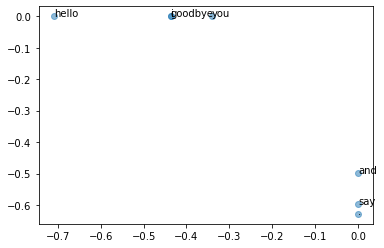

In [30]:
#그래프 그려보기
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha =0.5)
plt.show()

### PTB

In [31]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('size of corpus :', len(corpus))
print('corpus[:30]:', corpus[:30])
print('id to word[0]', id_to_word[0])
print('id to word[1]', id_to_word[1])
print('id to word[2]', id_to_word[2])


print('word_to_id[car]', word_to_id['car'])
print('word_to_id[happy]', word_to_id['happy'])
print('word_to_id[lexus]', word_to_id['lexus'])

Done
size of corpus : 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
id to word[0] aer
id to word[1] banknote
id to word[2] berlitz
word_to_id[car] 3856
word_to_id[happy] 4428
word_to_id[lexus] 7426


In [32]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print("동시 발생 수 계산...")

C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산...')
W = ppmi(C, verbose=True) # 이번엔 되네 ??

print('SVD 계산...')
try:
    #truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you','year','car','toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시 발생 수 계산...
PPMI 계산...


C:\Users\qhrrl\CodeExamples\0.ML_1.0.1\DLFS\volume2\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\qhrrl\CodeExamples\0.ML_1.0.1\DLFS\volume2\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산...

[query] you
 i: 0.6921945810317993
 we: 0.6520967483520508
 do: 0.5859313607215881
 'd: 0.5160282

In [33]:
window_size = 4
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print("동시 발생 수 계산...")

C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산...')
W = ppmi(C, verbose=True) # 이번엔 되네 ??

print('SVD 계산...')
try:
    #truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you','year','car','toyota', 'do', 'else', 'hyundai']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시 발생 수 계산...
PPMI 계산...


C:\Users\qhrrl\CodeExamples\0.ML_1.0.1\DLFS\volume2\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\qhrrl\CodeExamples\0.ML_1.0.1\DLFS\volume2\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산...

[query] you
 do: 0.6776507496833801
 'll: 0.6288953423500061
 i: 0.6034677624702454
 going: 0.602

# 컴퓨터에게 단어의 의미 이해시키기

# 시소러스 , 통계적 기반이 있음

# 시소러스는 힘들고 표현에 한계 존재

# 통계적 기반 기법은 corpus로부터 단어의 의미를 자동 추출하고 벡터화 한다

# (= 단어의 동시발생 행렬을 만들고, PPMI 해열ㄹ로 변환 후 차원축소를 하여 단어의 분산표현 생성)

